#### Malignant : The term "malignancy" refers to the presence of cancerous cells that have the ability to spread to other sites in the body (metastasize) or to invade nearby (locally) and destroy tissues.

#### Benign : Benign refers to a condition, tumor, or growth that is not cancerous. This means that it does not spread to other parts of the body

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../TensorFlow_FILES/DATA/cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: >

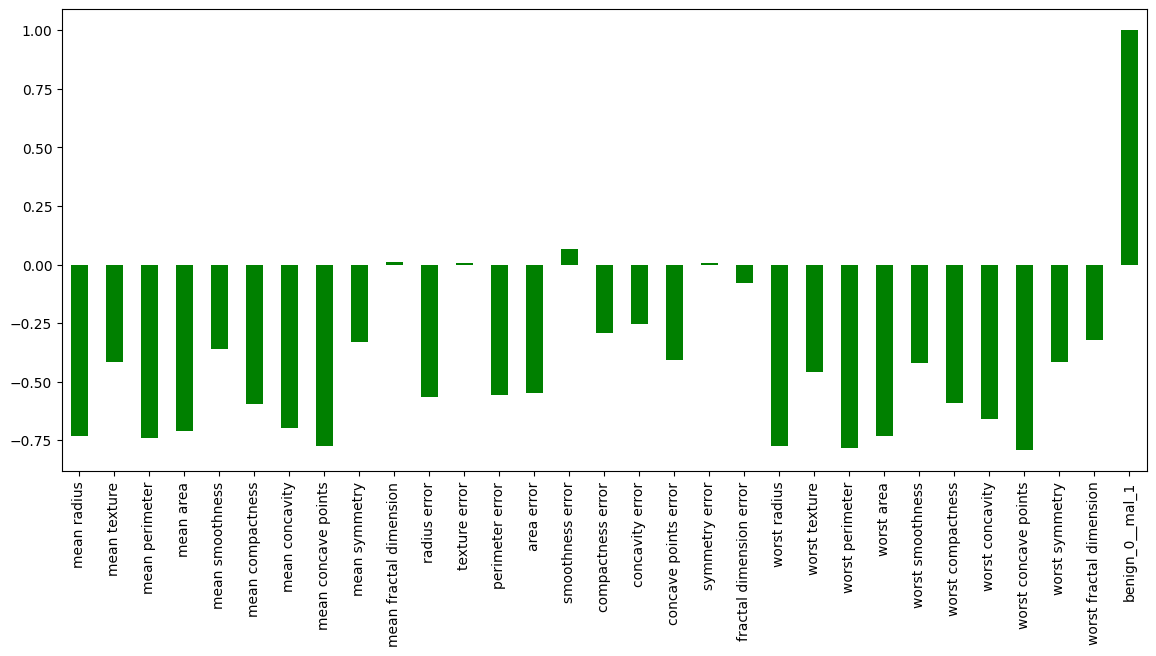

In [5]:
plt.figure(figsize=(14, 6))
df.corr()['benign_0__mal_1'].plot(kind='bar', color='green')

### **See if the dataset is balanced or not**

C:\Users\Yasir Qayyum\AppData\Local\Temp\ipykernel_13404\1770437476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['benign_0__mal_1'], data=df, palette='RdYlGn')


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

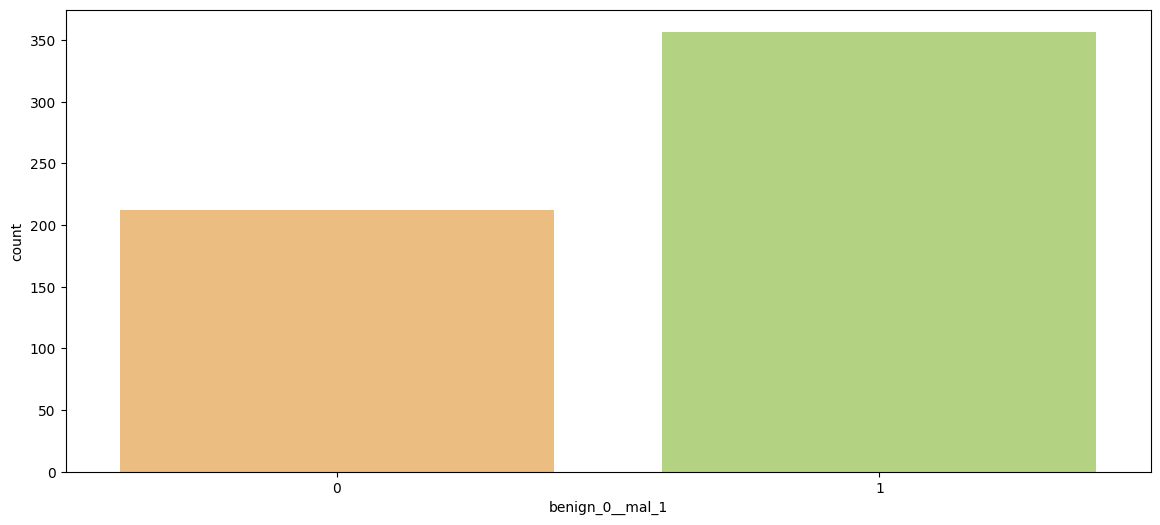

In [6]:
plt.figure(figsize=(14, 6))
sns.countplot(x=df['benign_0__mal_1'], data=df, palette='RdYlGn')

In [7]:
df['benign_0__mal_1'].value_counts()

benign_0__mal_1
1    357
0    212
Name: count, dtype: int64

<Axes: >

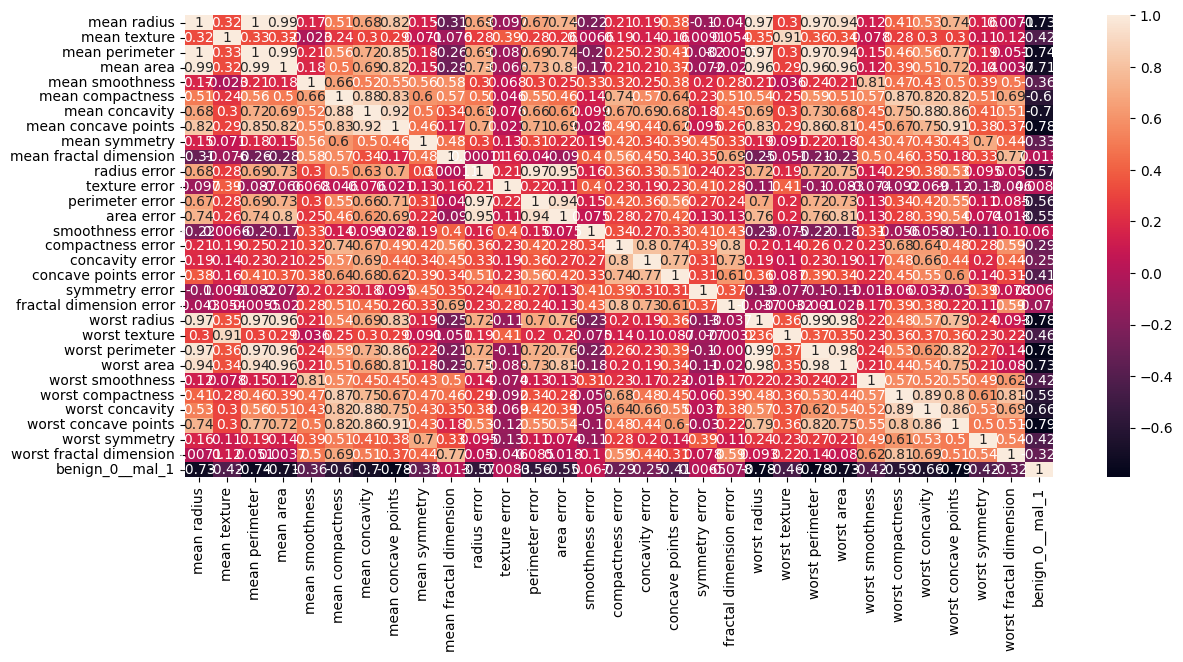

In [8]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

### **Finding top 3 features to plot on histogram**

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# Assuming `df` is a pandas DataFrame with numerical features
features = df.columns
data = df.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

shannon_entropy = np.zeros(data.shape[1])

for i in range(data.shape[1]):
    hist, _ = np.histogram(scaled_data[:, i], bins=20)
    hist = (hist + 1e-9) / (hist.sum() + 1e-9) # add small constant to avoid zero frequency
    shannon_entropy[i] = -np.sum(hist * np.log2(hist))

top_features = features[np.argsort(shannon_entropy)[-3:]].tolist()
print("Top 3 Feature To Plot : ",top_features)

Top 3 Feature To Plot :  ['worst smoothness', 'worst texture', 'worst concave points']


### To determine the number of bins : take the square root of the length of dataframe

In [10]:
np.sqrt(len(df))

23.853720883753127

<Axes: xlabel='worst smoothness', ylabel='Count'>

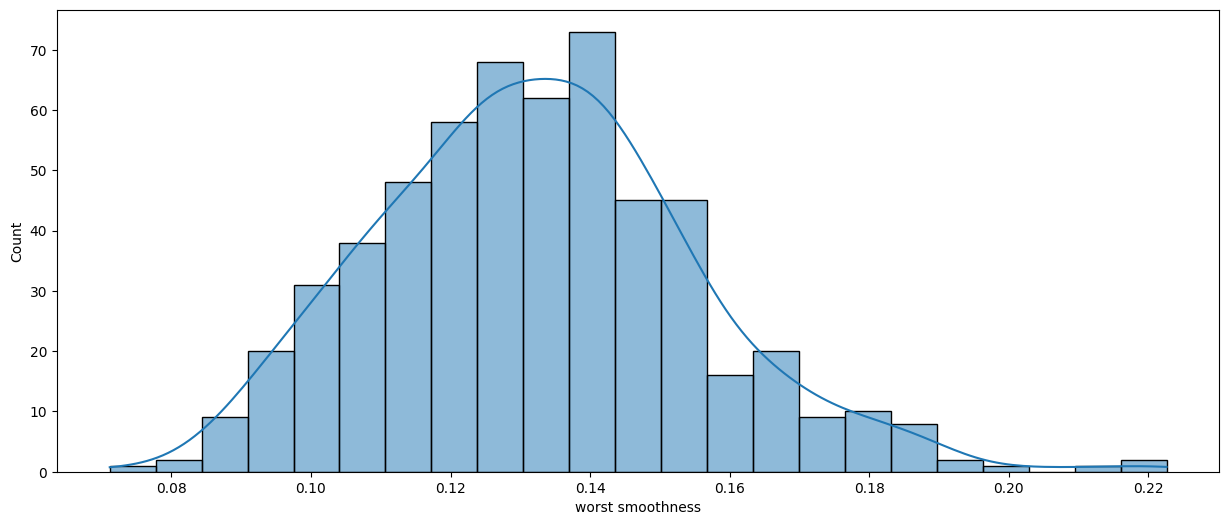

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df['worst smoothness'], kde=True, bins=23)

In [12]:
df['worst smoothness']

0      0.16220
1      0.12380
2      0.14440
3      0.20980
4      0.13740
        ...   
564    0.14100
565    0.11660
566    0.11390
567    0.16500
568    0.08996
Name: worst smoothness, Length: 569, dtype: float64

<Axes: xlabel='worst texture', ylabel='Count'>

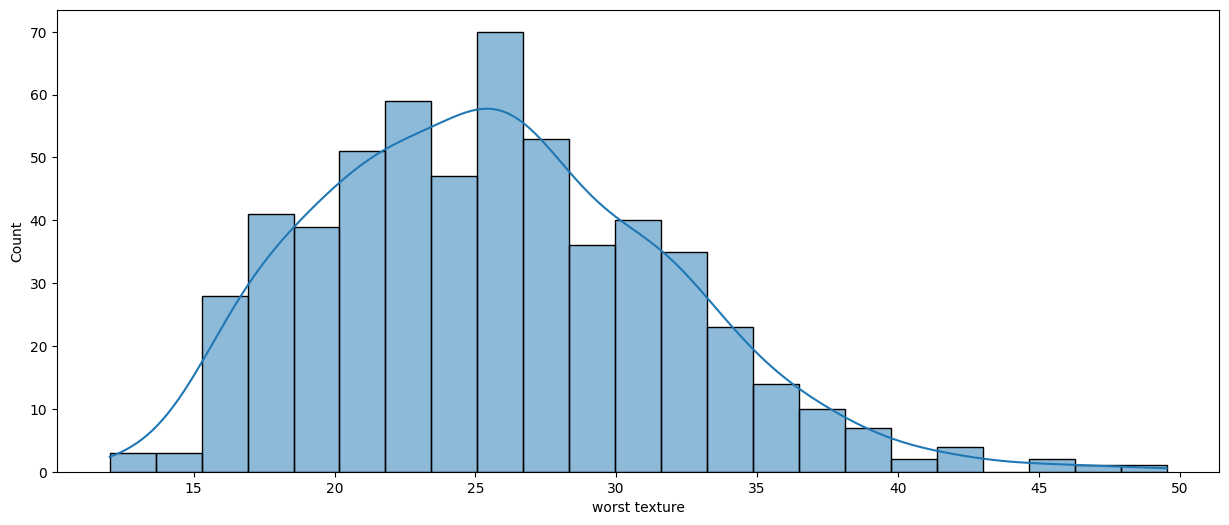

In [13]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df['worst texture'], kde=True, bins=23)

In [14]:
df['worst texture']

0      17.33
1      23.41
2      25.53
3      26.50
4      16.67
       ...  
564    26.40
565    38.25
566    34.12
567    39.42
568    30.37
Name: worst texture, Length: 569, dtype: float64

<Axes: xlabel='worst concave points', ylabel='Count'>

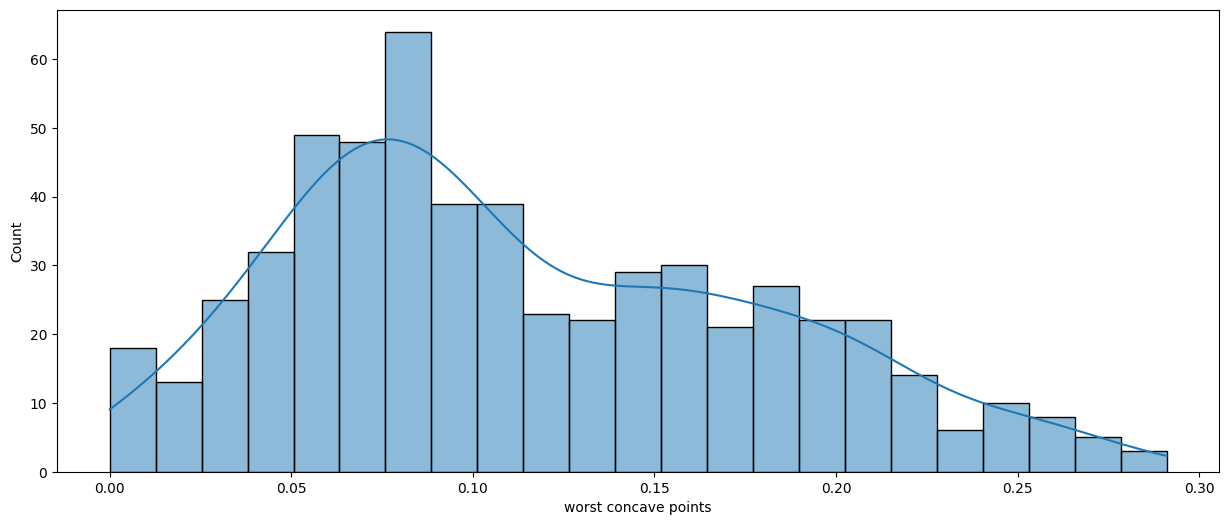

In [15]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df['worst concave points'], kde=True, bins=23)

In [16]:
df['worst concave points']

0      0.2654
1      0.1860
2      0.2430
3      0.2575
4      0.1625
        ...  
564    0.2216
565    0.1628
566    0.1418
567    0.2650
568    0.0000
Name: worst concave points, Length: 569, dtype: float64

In [17]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [18]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

## **Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## **Standardizing the data**

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
X_train.shape

(426, 30)

# **Creating And Training The Model** 

In [26]:
model = Sequential()

model.add(Dense(31, activation='relu'))
model.add(Dense(12, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 24ms/step - loss: 0.6731 - val_loss: 0.6522
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6372 - val_loss: 0.6182
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6025 - val_loss: 0.5830
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5681 - val_loss: 0.5486
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5335 - val_loss: 0.5121
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4983 - val_loss: 0.4748
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4633 - val_loss: 0.4372
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4283 - val_loss: 0.4012
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3950 - val_loss: 0.3678
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3671 - val_loss: 0.3348
Epoch 11

In [28]:
losses = pd.DataFrame(model.history.history)

<Axes: >

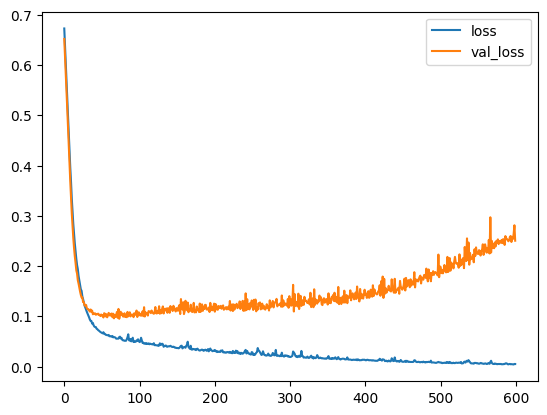

In [29]:
losses.plot()

The above trend clearly shows overfitting, at some point training loss and validation loss both are decreasing but after epoch 15 or somewhere the validation loss is getting increase and training loss is getting decrease after each epoch to prevent this we uses "REGULARIZATION".

### To Prevent this we have two Regularization Techniques

1) **Earlystopping callbacks**
2) **Dropout**


## **Early Stopping** 

Early stopping is a regularization technique used in training machine learning models, especially neural networks. It monitors the validation loss during training and stops training once the validation loss stops decreasing.

# **Redefine And Retrain The Model Using Early Stopping**

In [30]:
model = Sequential()

model.add(Dense(31, activation='relu'))
model.add(Dense(12, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Patience : it means we will train the model for next 25 epochs even after we detected the stopping point

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [32]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600


14/14 [==============================] - 1s 18ms/step - loss: 0.6826 - val_loss: 0.6636
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6505 - val_loss: 0.6316
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.5889
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5691 - val_loss: 0.5398
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5156 - val_loss: 0.4814
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4594 - val_loss: 0.4236
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4078 - val_loss: 0.3710
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3624 - val_loss: 0.3263
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3223 - val_loss: 0.2902
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2883 - val_loss: 0.2602
Epoch 11/600
14/14 

here we can clearly see the model training is automatically early stopped from 600 epochs becuase the loss is not further decreasing from 82 epochs and model is overfitting after that.

<Axes: >

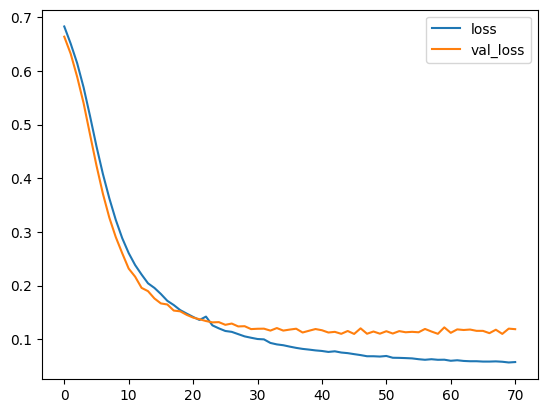

In [33]:
models_loss = pd.DataFrame(model.history.history)
models_loss.plot()

# **Redefine And Retrain The Model Using Dropout**

### DROPUOUT

It will turn off percentage of neurons randomly.
Dropout is a regularization technique used in training neural networks, especially in deep networks. It helps to prevent overfitting by randomly dropping out or "turning off" neurons during training.

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()

model.add(Dense(31, activation='relu'))
model.add(Dropout(rate=0.5))   # Randomly 50% neurons will be turned off

model.add(Dense(12, activation='relu'))
model.add(Dropout(rate=0.5))   # Randomly 50% neurons will be turned off

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
# we want to use the drop out with early stopping

model.fit(x = X_train, y = y_train, epochs=600, 
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600


14/14 [==============================] - 2s 21ms/step - loss: 0.7237 - val_loss: 0.7092
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6880 - val_loss: 0.6796
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6831 - val_loss: 0.6516
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6760 - val_loss: 0.6370
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6505 - val_loss: 0.6180
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6319 - val_loss: 0.6002
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5983 - val_loss: 0.5791
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5870 - val_loss: 0.5515
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5775 - val_loss: 0.5300
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5635 - val_loss: 0.5046
Epoch 11/600
14/14 

<Axes: >

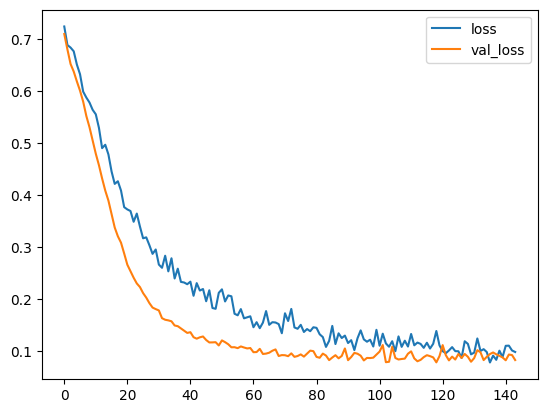

In [37]:
models_loss = pd.DataFrame(model.history.history)

models_loss.plot()

### **WOWWW the model has just performed far far better than the first one**

#### It is becuase of the implementation of regularization (early stopping and Dropout)

-----------------------------------------

# **Model Evaluation**

In [38]:
prediction = np.argmax(model.predict(X_test), axis=-1)
prediction

5/5 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import  confusion_matrix

In [40]:
confusion_matrix(y_test, prediction)

array([[55,  0],
       [88,  0]], dtype=int64)

## **Predicting Brand New Data (single data)**

In [48]:
df.iloc[1]

mean radius                  20.570000
mean texture                 17.770000
mean perimeter              132.900000
mean area                  1326.000000
mean smoothness               0.084740
mean compactness              0.078640
mean concavity                0.086900
mean concave points           0.070170
mean symmetry                 0.181200
mean fractal dimension        0.056670
radius error                  0.543500
texture error                 0.733900
perimeter error               3.398000
area error                   74.080000
smoothness error              0.005225
compactness error             0.013080
concavity error               0.018600
concave points error          0.013400
symmetry error                0.013890
fractal dimension error       0.003532
worst radius                 24.990000
worst texture                23.410000
worst perimeter             158.800000
worst area                 1956.000000
worst smoothness              0.123800
worst compactness        

In [43]:
new_data = df.drop('benign_0__mal_1', axis=1).iloc[1]

new_data

mean radius                  20.570000
mean texture                 17.770000
mean perimeter              132.900000
mean area                  1326.000000
mean smoothness               0.084740
mean compactness              0.078640
mean concavity                0.086900
mean concave points           0.070170
mean symmetry                 0.181200
mean fractal dimension        0.056670
radius error                  0.543500
texture error                 0.733900
perimeter error               3.398000
area error                   74.080000
smoothness error              0.005225
compactness error             0.013080
concavity error               0.018600
concave points error          0.013400
symmetry error                0.013890
fractal dimension error       0.003532
worst radius                 24.990000
worst texture                23.410000
worst perimeter             158.800000
worst area                 1956.000000
worst smoothness              0.123800
worst compactness        

In [46]:
new_data =  scaler.transform(new_data.values.reshape(-1, 30))
print("New Data Shape: ", new_data.shape)

New Data Shape:  (1, 30)


In [47]:
pred = np.argmax(model.predict(new_data), axis=-1)
pred

1/1 [==============================] - 0s 50ms/step


array([0], dtype=int64)

### **The model has predicted the correct label for the given data**
---------------------